In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [8]:
# loading data with preprocessed tweets
df = pd.read_csv('data/cleaned_tweets.csv')

In [9]:
predictions = np.load('data/predictions.npy')

In [10]:
# extract days from timestamps
tqdm.pandas(desc="Extracting days from timestamps")
dates = df['Timestamp'].progress_apply(lambda x: x.split(' ')[0])
df['Timestamp'] = dates

Extracting days from timestamps: 100%|██████████| 561730/561730 [00:03<00:00, 154382.13it/s]


In [11]:
df['Date'] = pd.to_datetime(df['Timestamp']) - pd.to_timedelta(7, unit='d')

In [26]:
# add predictions to dataframe
for i in range(11):
    class_name = 'Class ' + str(i)
    df[class_name] = 1.0 / (1.0 + np.exp(-predictions[:, i]))

In [13]:
columns = ['Date', 'Class 0', 'Class 1', \
           'Class 2', 'Class 3', 'Class 4', \
            'Class 5', 'Class 6', 'Class 7', \
            'Class 8', 'Class 9', 'Class 10']

df = df[columns]

In [27]:
# group by week
weekly_df = df.groupby(pd.Grouper(key='Date', freq='W')).mean()

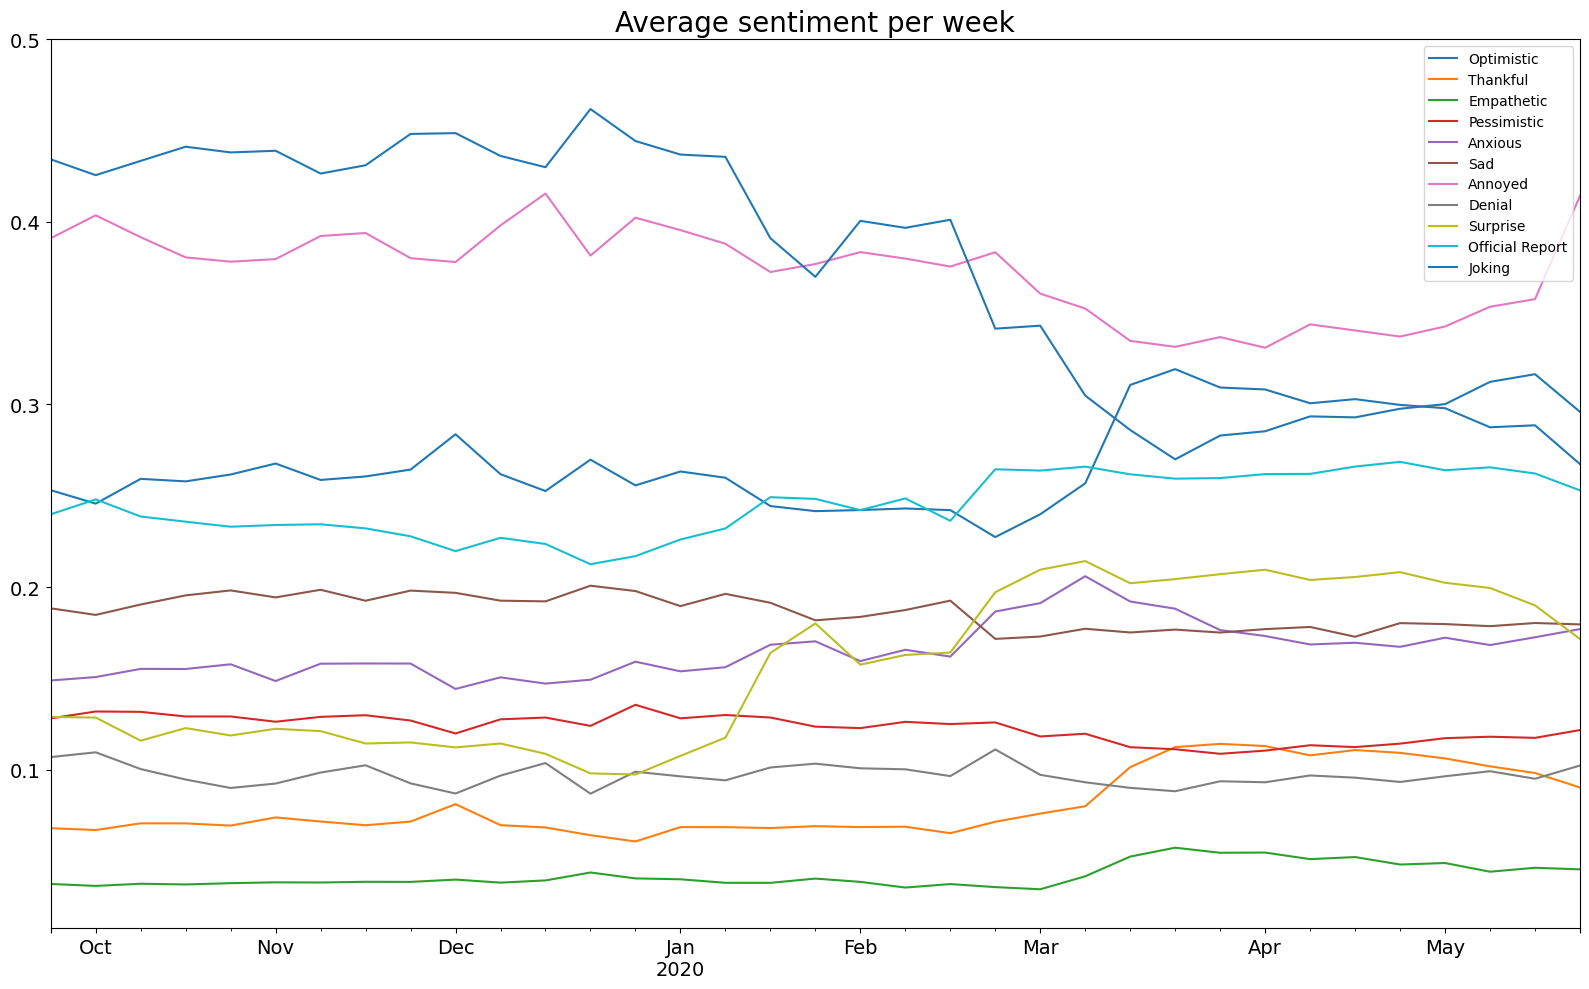

In [33]:
# plot averages
yticks = [0.1, 0.2, 0.3, 0.4, 0.5]
emotions = ['Optimistic', 'Thankful', 'Empathetic', \
            'Pessimistic', 'Anxious', 'Sad', 'Annoyed', \
            'Denial', 'Surprise', 'Official Report', 'Joking']
weekly_df.plot(figsize=(16, 10))
plt.title('Average sentiment per week', fontsize=20)
plt.legend(labels=emotions, fontsize=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, ticks=yticks)
plt.xlabel('')
plt.tight_layout()
plt.savefig('plots/ea_average_sentiment.png')
plt.show()

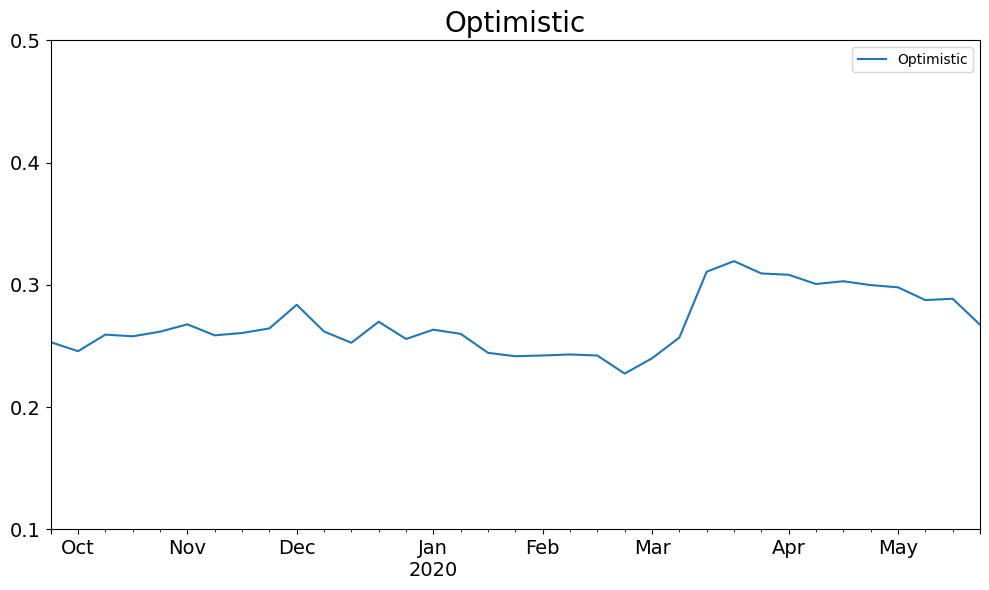

In [40]:
weekly_df[['Class 0']].plot(figsize=(10, 6))
plt.title('Optimistic', fontsize=20)
plt.legend(labels=['Optimistic'])
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

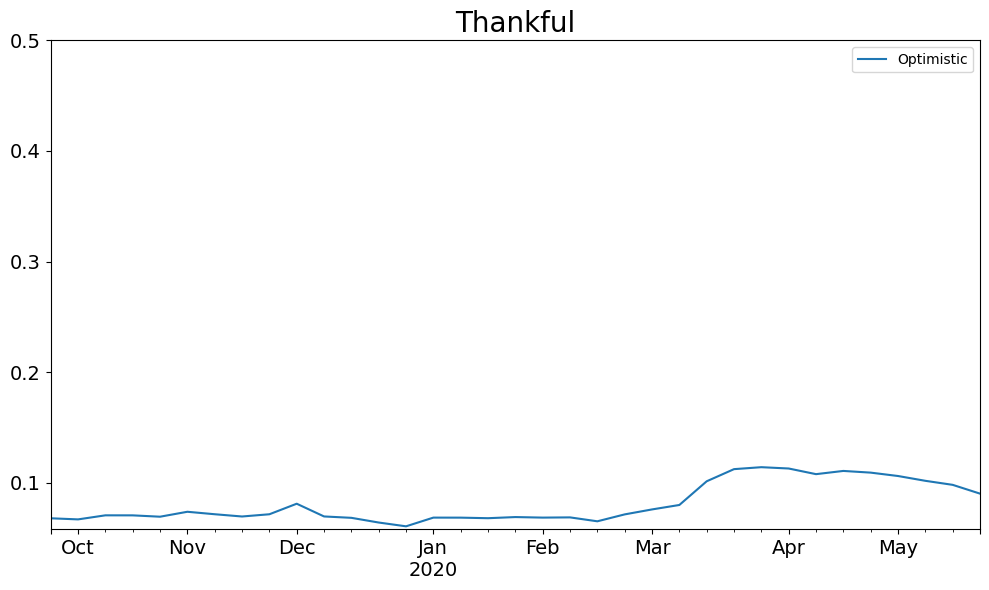

In [41]:
weekly_df[['Class 1']].plot(figsize=(10, 6))
plt.title('Thankful', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

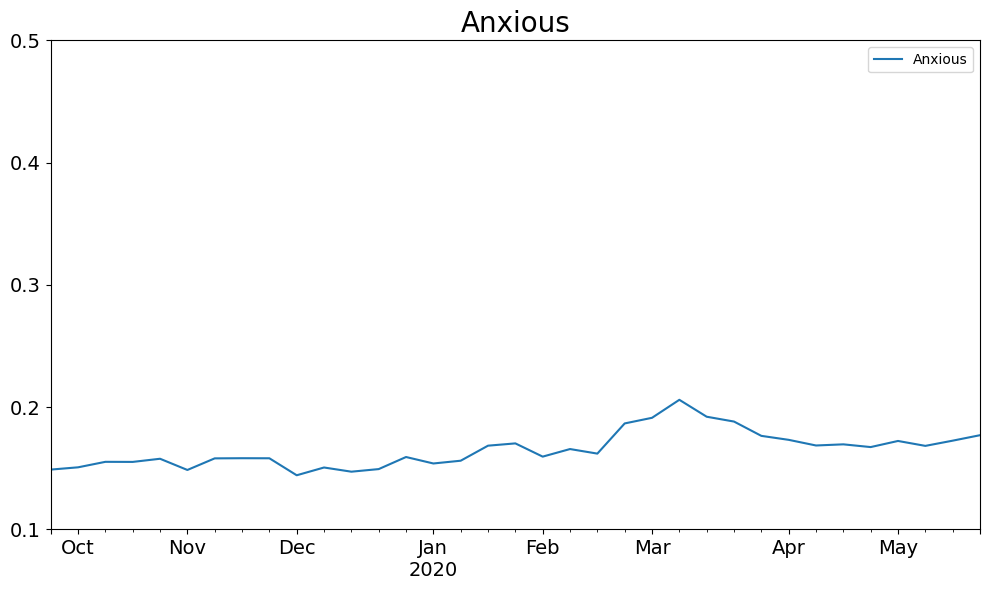

In [44]:
weekly_df[['Class 4']].plot(figsize=(10, 6))
plt.title('Anxious', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

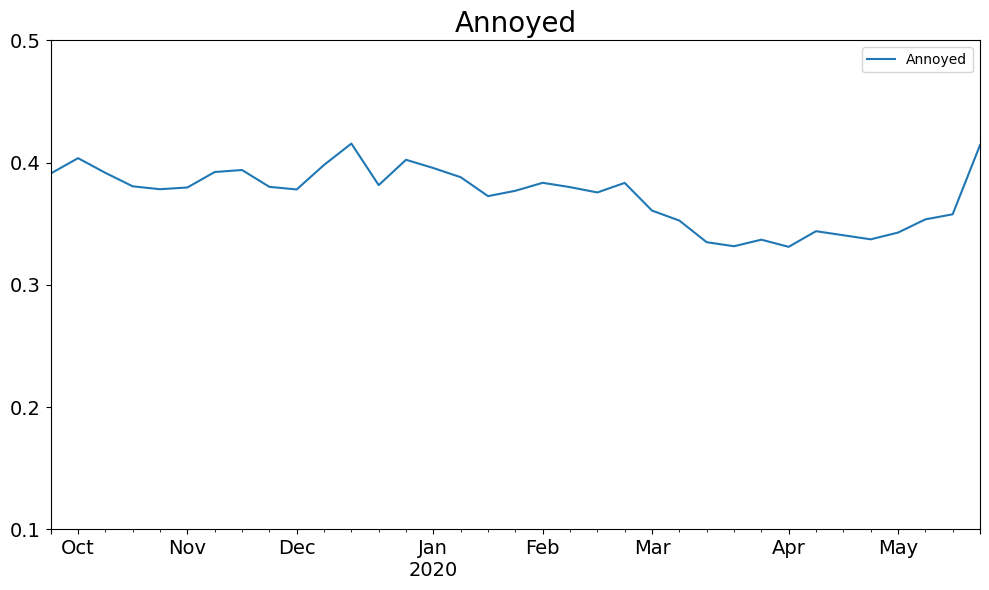

In [46]:
weekly_df[['Class 6']].plot(figsize=(10, 6))
plt.title('Annoyed', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

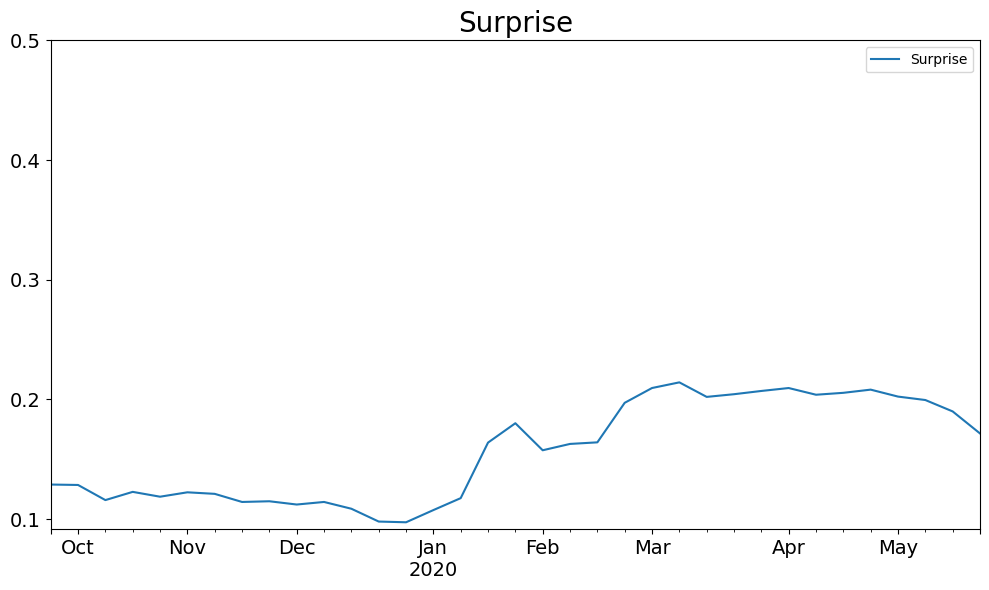

In [48]:
weekly_df[['Class 8']].plot(figsize=(10, 6))
plt.title('Surprise', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

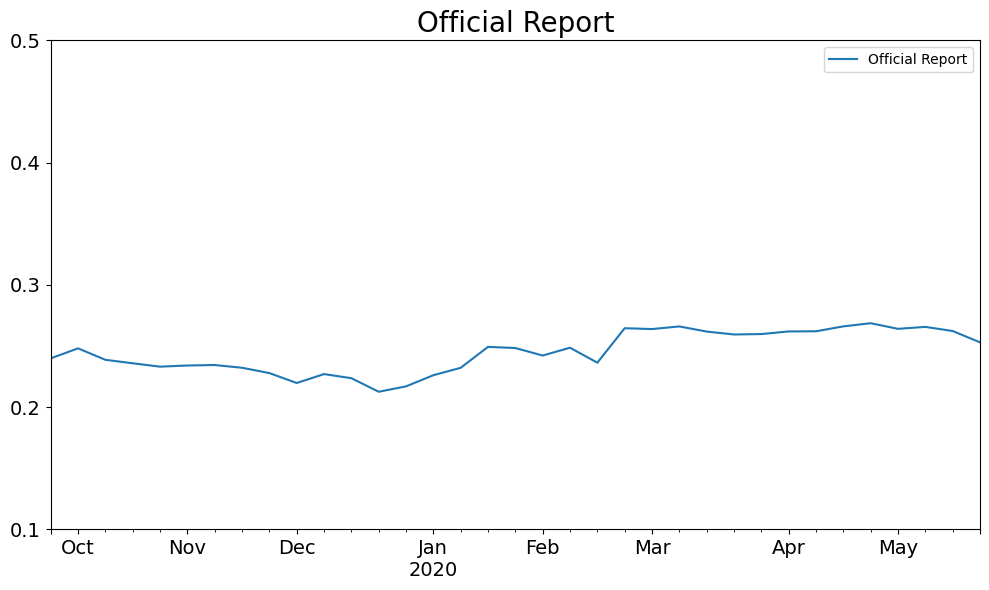

In [49]:
weekly_df[['Class 9']].plot(figsize=(10, 6))
plt.title('Official Report', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

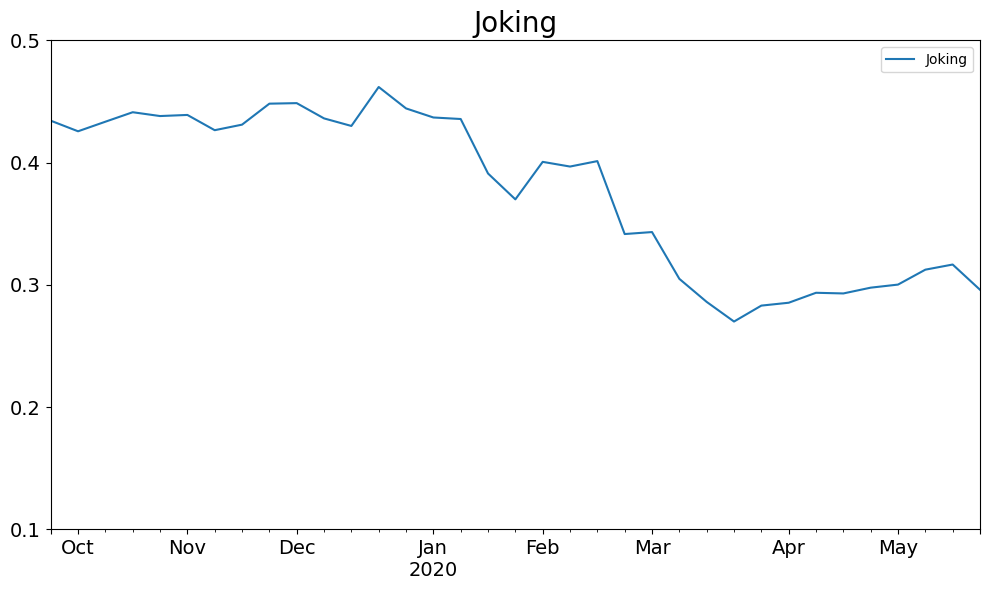

In [50]:
weekly_df[['Class 10']].plot(figsize=(10, 6))
plt.title('Joking', fontsize=20)
plt.yticks(fontsize=14, ticks=yticks)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [51]:
classes = ['Class 0', 'Class 1', 'Class 4', \
           'Class 6', 'Class 8', 'Class 9', \
            'Class 10']
names = ['Optimistic', 'Thankful', 'Anxious', \
         'Annoyed', 'Surprise', 'Official Report', \
            'Joking']

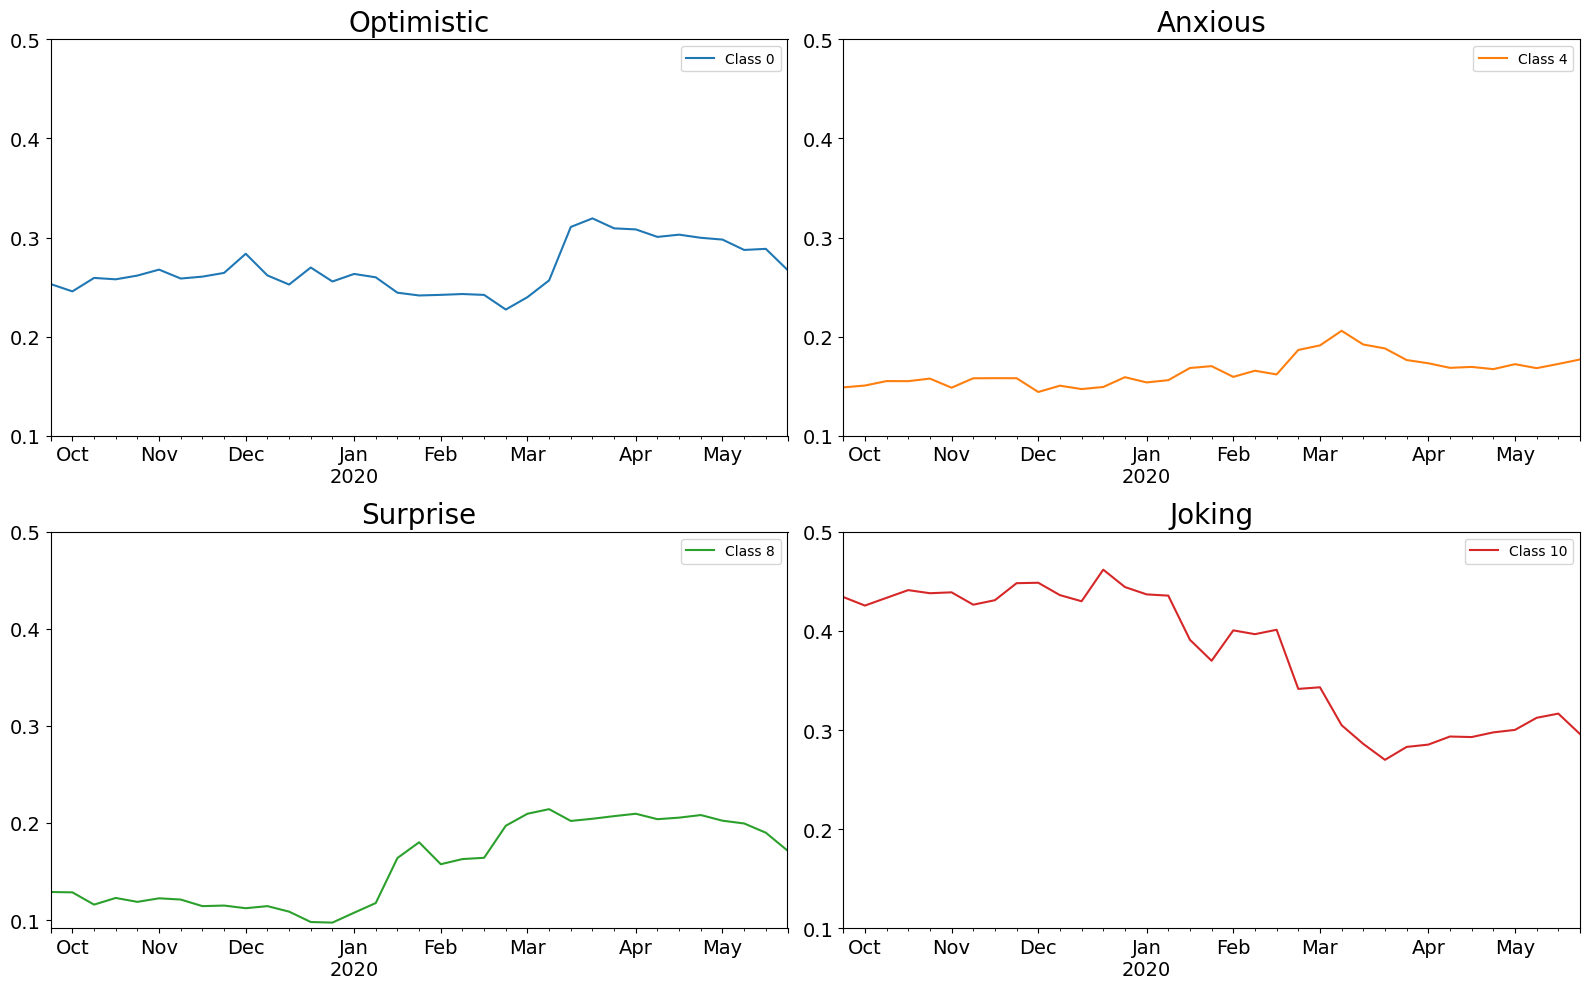

In [57]:
strongest_classes = ['Class 0', 'Class 4', 'Class 8', 'Class 10']
strongest_names = ['Optimistic', 'Anxious', 'Surprise', 'Joking']

# make subplots for stronges emotions
# use different colors for each emotion

fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()
for i in range(len(strongest_classes)):
    weekly_df[[strongest_classes[i]]].plot(ax=axs[i], color='C' + str(i))
    axs[i].set_title(strongest_names[i], fontsize=20)
    axs[i].set_yticks(yticks)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('plots/ea_strongest_emotions.png')

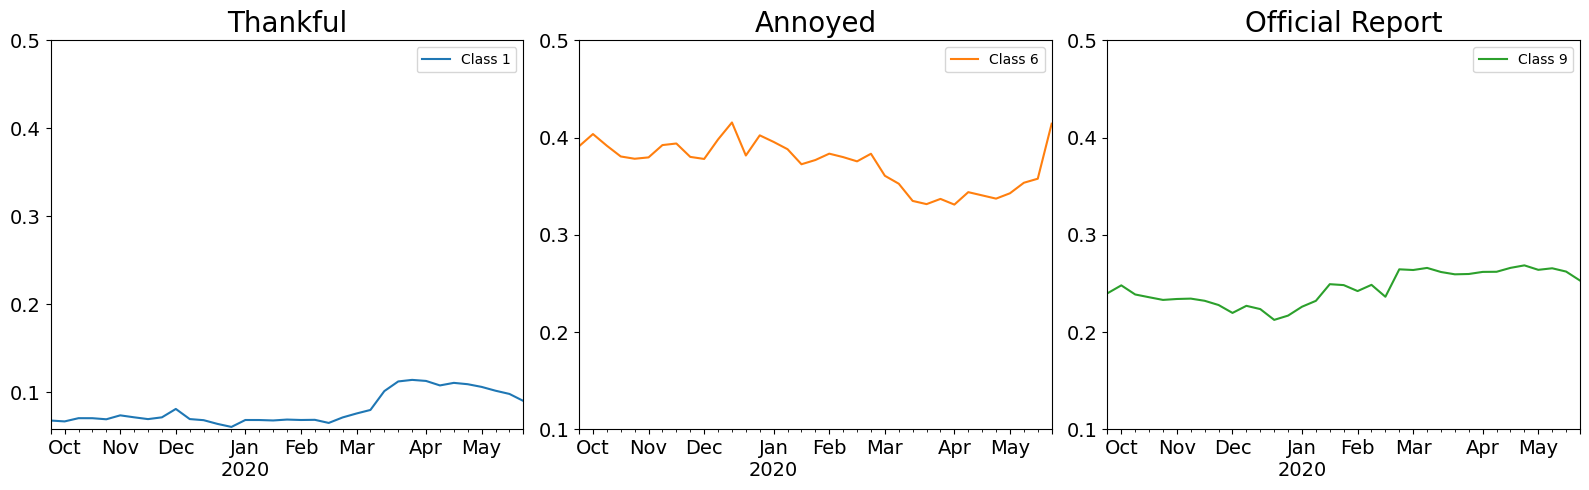

In [58]:
# weak emotions
weak_classes = ['Class 1', 'Class 6', 'Class 9']
weak_names = ['Thankful', 'Annoyed', 'Official Report']

# make subplots for weak emotions
# use different colors for each emotion

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
axs = axs.flatten()
for i in range(len(weak_classes)):
    weekly_df[[weak_classes[i]]].plot(ax=axs[i], color='C' + str(i))
    axs[i].set_title(weak_names[i], fontsize=20)
    axs[i].set_yticks(yticks)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.savefig('plots/ea_weak_emotions.png')